## Libraries

In [1]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd




# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns



# Preprocesamiento
# ==============================================================================
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder  
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder 
import math
from sklearn.preprocessing import MinMaxScaler
from scipy import stats


# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer


#Linear Regresion con Sklearn
# ==============================================================================
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics




# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')


# Tamaño gráficas
# ==============================================================================
plt.rcParams["figure.figsize"] = (10,8)

In [2]:
#df = pd.read_csv('../data/test.csv')
#df.head()

In [3]:
df = pd.read_csv('../data/diamonds.csv')
df.head()

df


,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.30,Premium,D,SI2,62.4,58.0,4.31,4.28,2.68,6.353
1,1,1.01,Ideal,E,VVS2,62.7,56.0,6.42,6.46,4.04,9.183
2,2,0.72,Ideal,F,VS2,61.8,59.0,5.71,5.74,3.54,7.983
3,3,1.08,Very Good,G,SI2,63.2,57.0,6.54,6.50,4.12,8.371
4,4,0.36,Premium,G,VS1,62.3,59.0,4.50,4.55,2.82,6.588
...,...,...,...,...,...,...,...,...,...,...,...
40450,40450,0.42,Premium,D,SI2,62.1,59.0,4.78,4.82,2.98,6.551
40451,40451,0.53,Premium,G,VS2,62.0,58.0,5.21,5.18,3.22,7.382
40452,40452,0.80,Good,G,SI2,62.8,58.0,5.86,5.90,3.69,7.768
40453,40453,1.01,Very Good,F,VS2,61.5,57.0,6.40,6.48,3.96,8.726


## EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       40455 non-null  int64  
 1   carat    40455 non-null  float64
 2   cut      40455 non-null  object 
 3   color    40455 non-null  object 
 4   clarity  40455 non-null  object 
 5   depth    40455 non-null  float64
 6   table    40455 non-null  float64
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
 10  price    40455 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 3.4+ MB


In [5]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df = df.drop_duplicates()

In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [10]:
df.select_dtypes(include = np.number).describe().T

,count,mean,std,min,25%,50%,75%,max
id,40455.0,20227.000000,11678.496907,0.000,10113.500,20227.00,30340.500,40454.000
carat,40455.0,0.797576,0.475939,0.200,0.400,0.70,1.040,5.010
depth,40455.0,61.746377,1.436796,43.000,61.000,61.80,62.500,79.000
table,40455.0,57.451694,2.234569,44.000,56.000,57.00,59.000,95.000
x,40455.0,5.729163,1.125244,0.000,4.710,5.69,6.540,10.740
y,40455.0,5.732896,1.154799,0.000,4.720,5.70,6.540,58.900
z,40455.0,3.537351,0.711002,0.000,2.910,3.52,4.030,31.800
price,40455.0,7.783822,1.016828,5.787,6.851,7.78,8.581,9.842


## Visualization

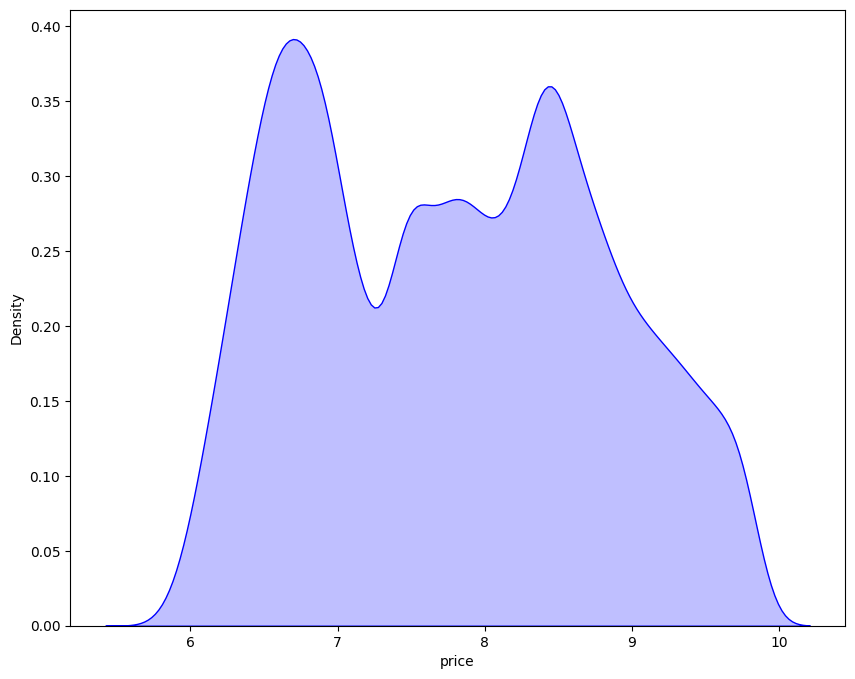

In [11]:
sns.distplot(
    df.price, 
    hist = False, 
    color = "blue", 
    kde_kws = {"shade": True, "linewidth": 1});

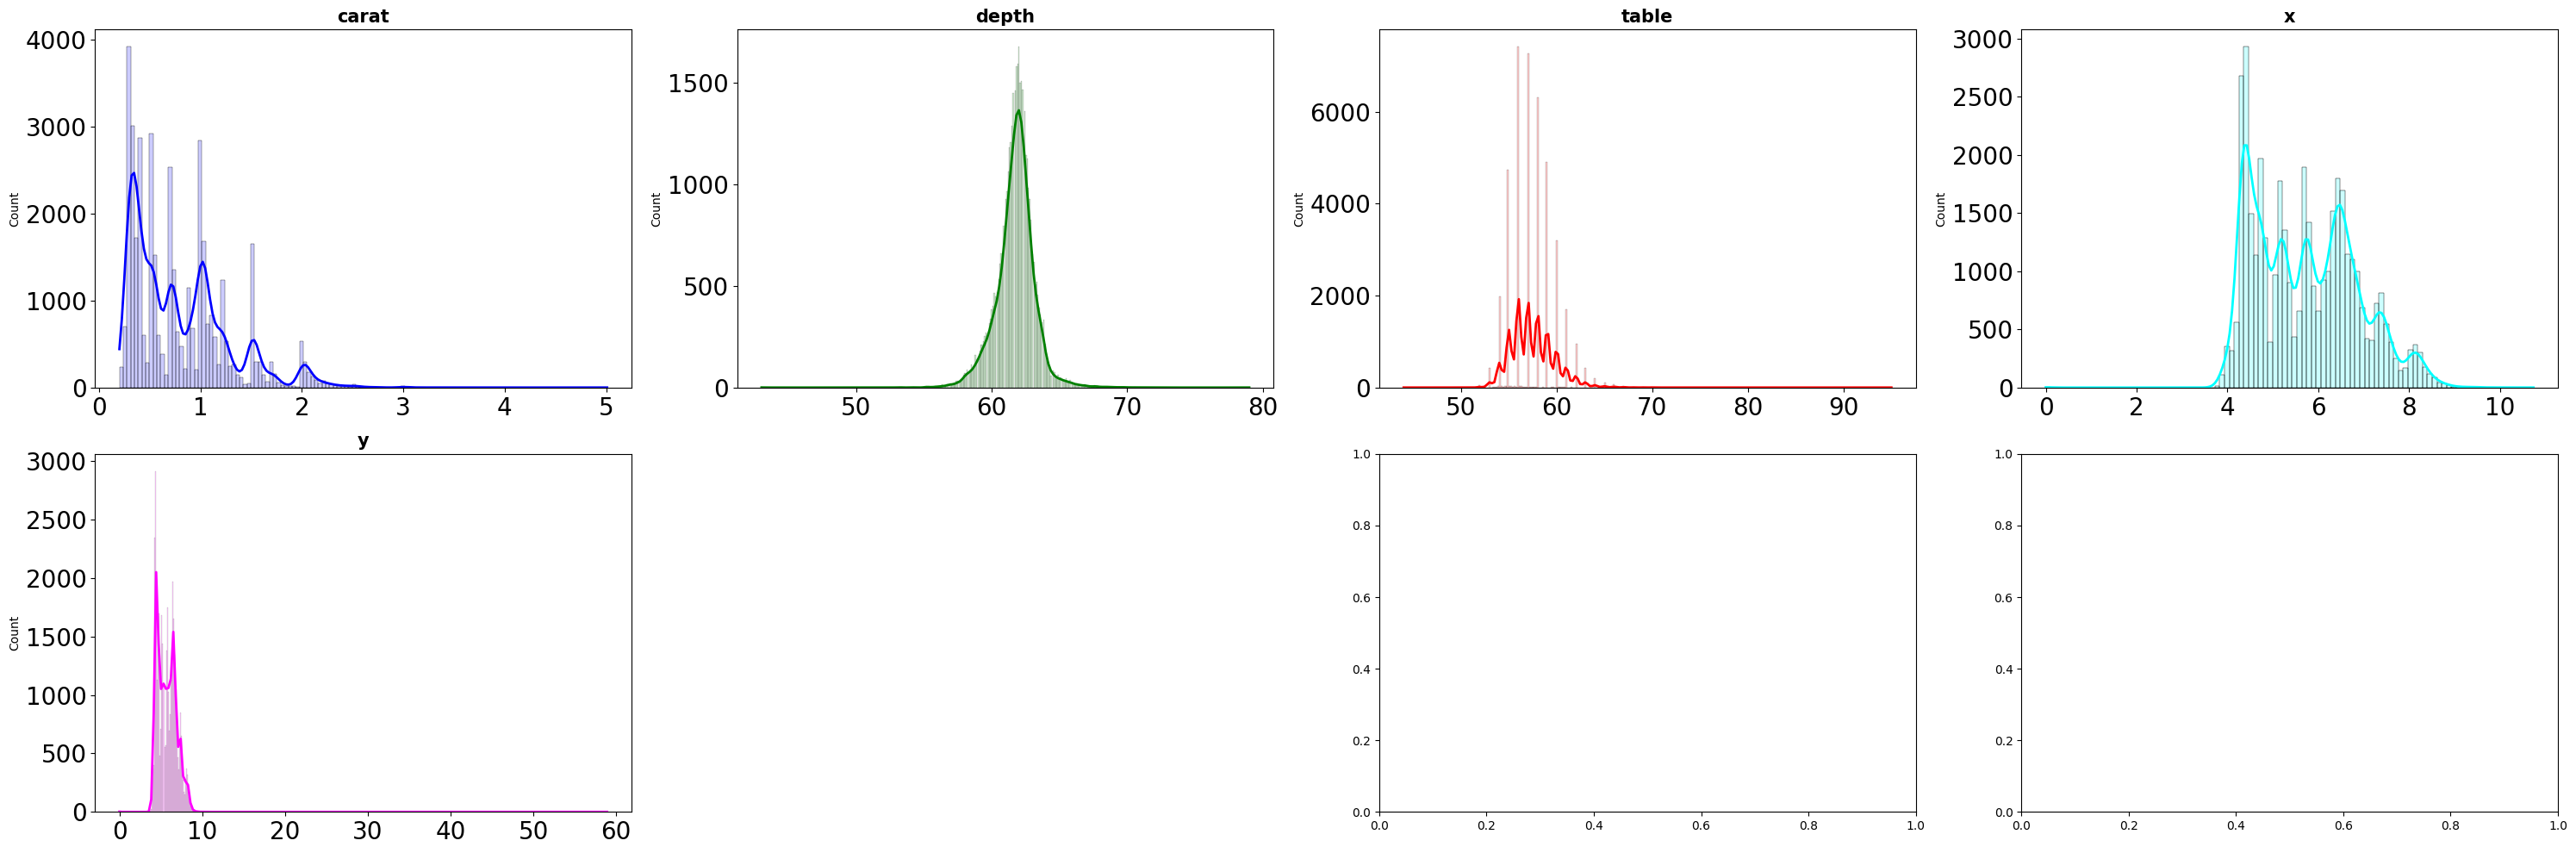

In [13]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================

fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (30, 10))

lista_colores = ["blue", "green", "red", "cyan", "magenta", "orange"]

axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop(["price","id"])

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df,
        x = colum,
        kde = True, 
        color = lista_colores[i], 
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    

fig.tight_layout()
fig.delaxes(axes[i]) # Eliminamos el último eje que no se usa;

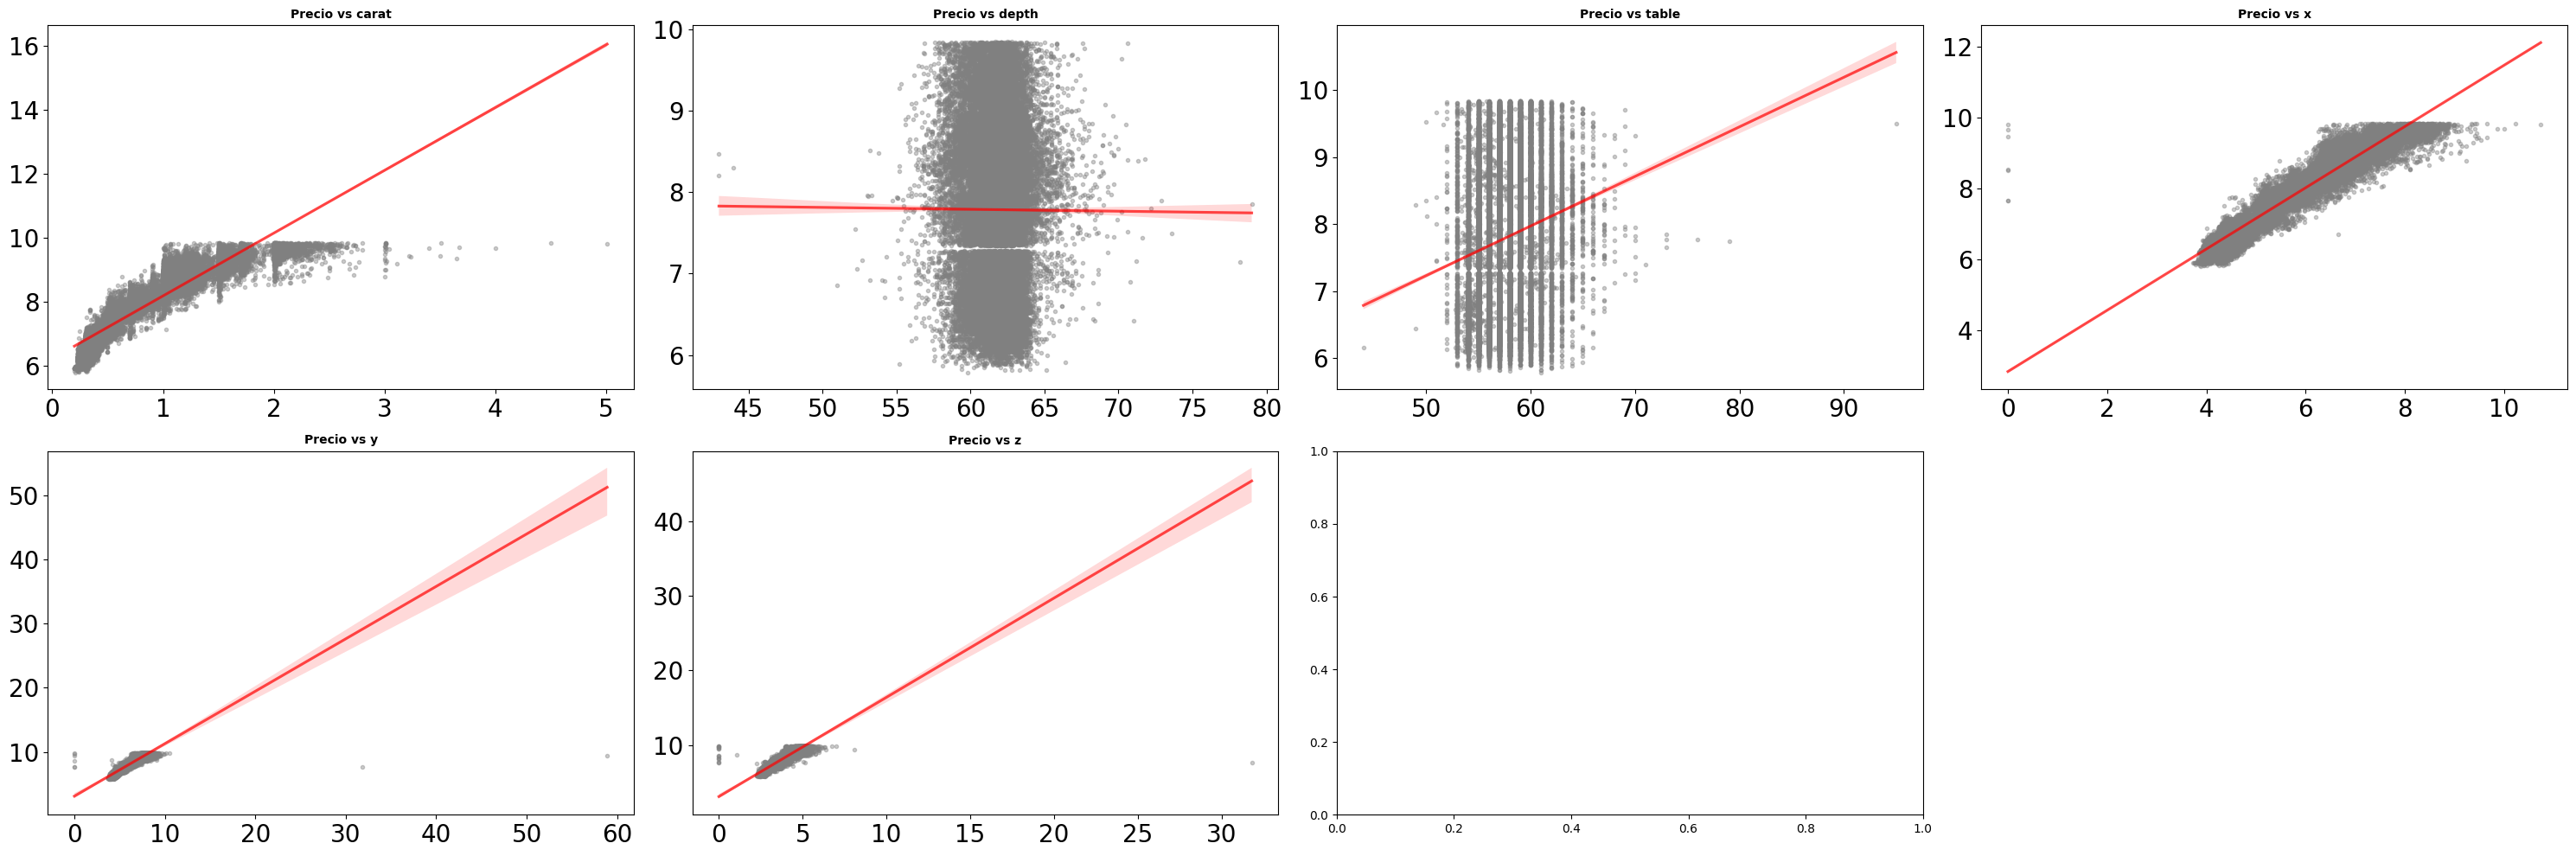

In [16]:
# Gráfico de relación entre variables predictoras y la variable a predecir
# ==============================================================================


fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (30, 10))

lista_colores = ["blue", "green", "red", "cyan", "magenta", "orange"]

axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop(["price","id"])

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x = df[colum], 
        y = df["price"], 
        color = "gray", 
        marker = ".", 
        scatter_kws = {"alpha": 0.4}, 
        line_kws = {"color": "red", "alpha": 0.7 }, 
        ax = axes[i])
    
    axes[i].set_title(f"Precio vs {colum}", fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
fig.tight_layout()
fig.delaxes(axes[-1]) 

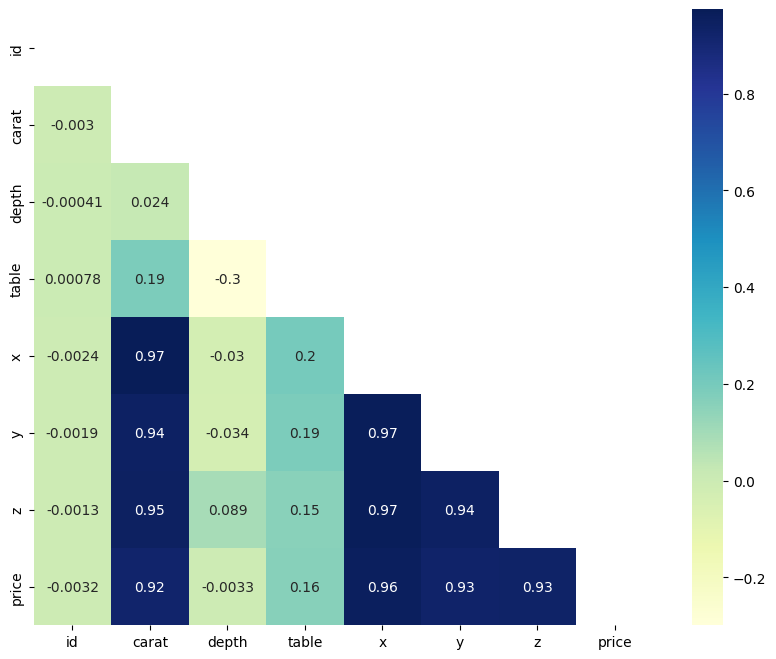

In [17]:
mask = np.triu(np.ones_like(df.corr(numeric_only=True), dtype = np.bool_))

sns.heatmap(df.corr(numeric_only = True), 
           cmap = "YlGnBu", 
            mask = mask,
           annot = True);

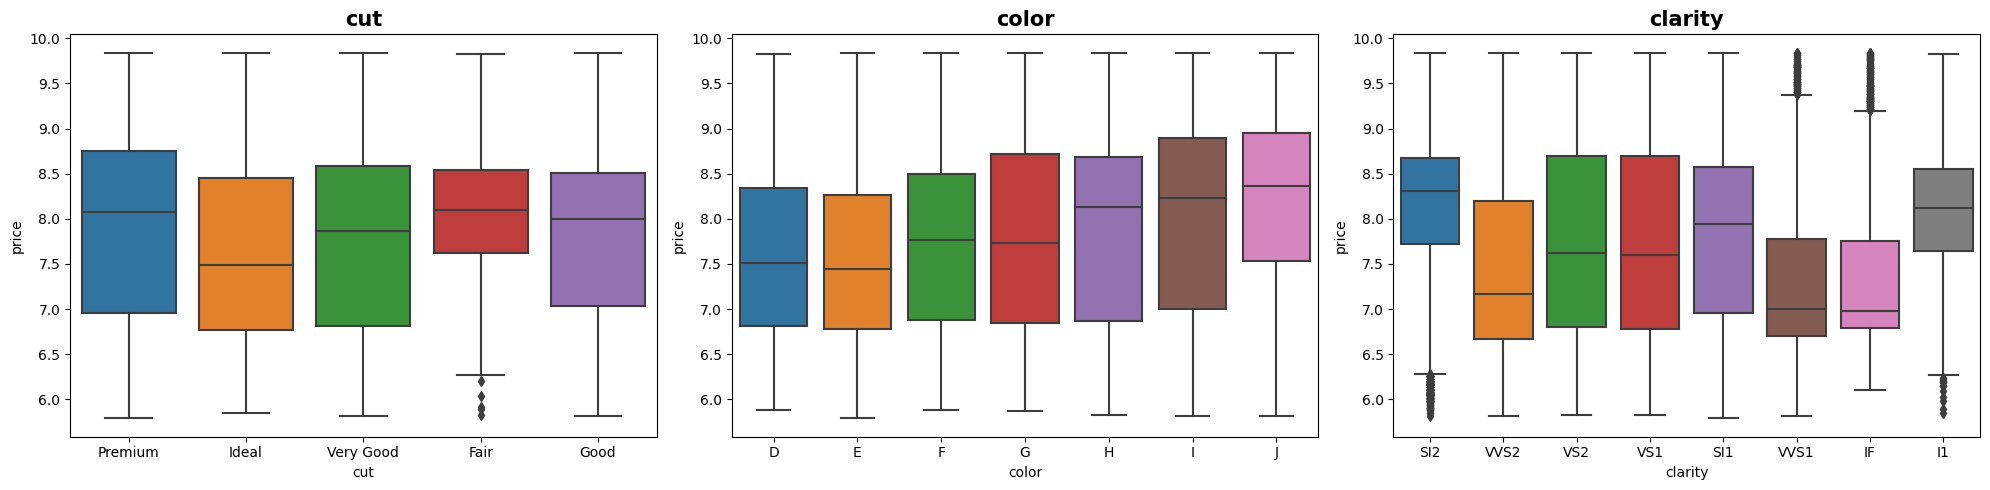

In [18]:
# Gráfico para cada variable cualitativa
# ==============================================================================

fig, axes = plt.subplots(1, 3, figsize = (20,5))


columnas_object = df.select_dtypes(include = "object").columns

for i, colum in enumerate(columnas_object):
    sns.boxplot(x=colum, y="price", data=df,ax=axes[i])
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")

    
fig.tight_layout();

## Null Management

### There are no nulls in the df

## Outlier management

In [19]:
df_numericas = df.select_dtypes(include=np.number)
df_numericas.head(2)

,id,carat,depth,table,x,y,z,price
0,0,0.30,62.4,58.0,4.31,4.28,2.68,6.353
1,1,1.01,62.7,56.0,6.42,6.46,4.04,9.183


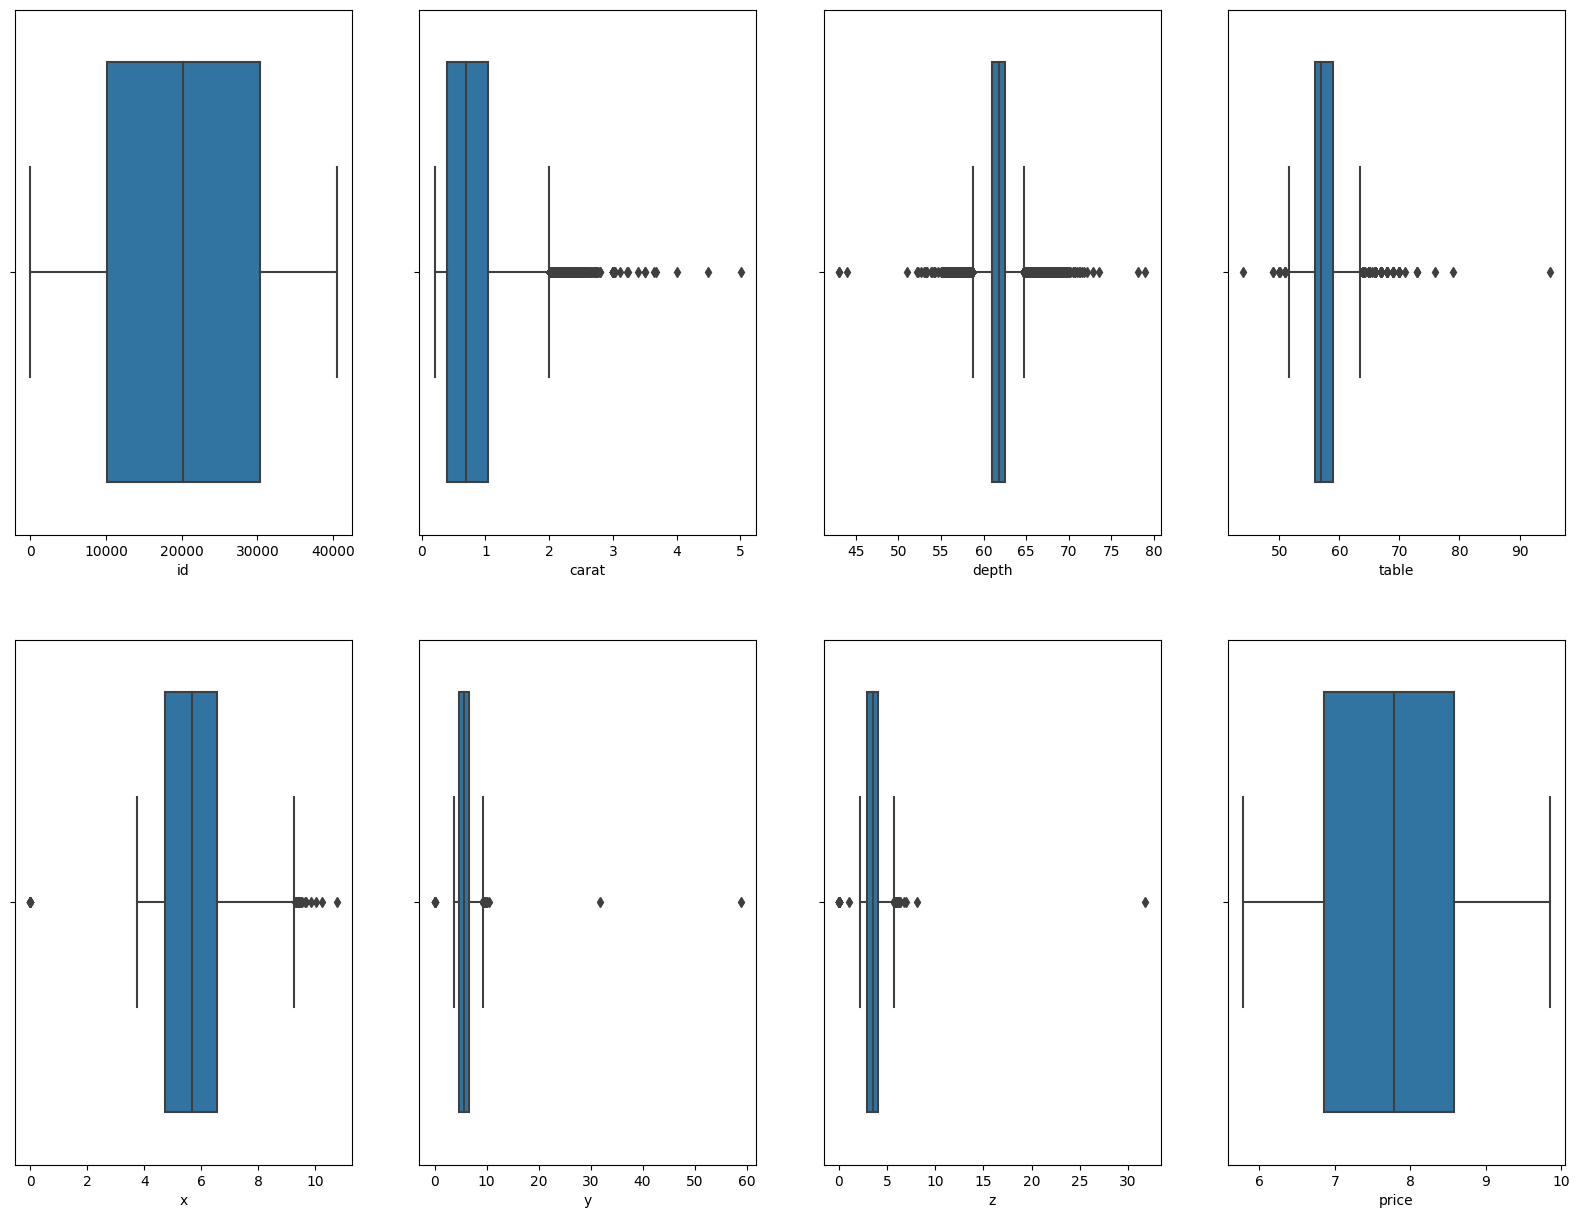

In [20]:
fig, axes = plt.subplots(2, 4, figsize=(20,15))
axes = axes.flat

for indice, columna in enumerate(df_numericas.columns):
    sns.boxplot(x=columna, data=df_numericas, ax=axes[indice])
plt.show()

In [21]:
def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(dataframe[col], 25)
        Q3 = np.nanpercentile(dataframe[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        

    
    return dicc_indices 

In [22]:
lista_columnas = df_numericas.columns
lista_columnas

Index(['id', 'carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')

In [23]:
# aplicamos la función y sacamos los índices de los outliers.

ind = detectar_outliers(lista_columnas, df)
print(ind)

{'carat': [40, 85, 130, 173, 244, 264, 274, 289, 292, 295, 312, 346, 398, 574, 587, 662, 681, 682, 716, 725, 728, 782, 785, 798, 799, 801, 818, 928, 973, 993, 995, 1011, 1025, 1026, 1051, 1154, 1216, 1249, 1315, 1388, 1402, 1417, 1418, 1423, 1429, 1433, 1437, 1443, 1522, 1660, 1670, 1739, 1814, 1816, 1866, 1885, 1894, 1967, 1971, 1977, 1995, 2030, 2052, 2063, 2071, 2178, 2194, 2224, 2229, 2238, 2257, 2289, 2340, 2346, 2352, 2357, 2410, 2440, 2449, 2460, 2465, 2468, 2496, 2518, 2529, 2530, 2556, 2570, 2664, 2683, 2767, 2785, 2799, 2811, 2884, 2912, 2935, 2939, 2971, 2981, 3018, 3032, 3073, 3123, 3140, 3146, 3149, 3156, 3237, 3297, 3316, 3348, 3351, 3369, 3378, 3381, 3403, 3430, 3481, 3488, 3491, 3502, 3525, 3545, 3558, 3580, 3593, 3606, 3658, 3666, 3667, 3675, 3699, 3747, 3780, 3790, 3820, 3828, 3837, 3844, 3908, 4084, 4124, 4147, 4192, 4215, 4276, 4285, 4327, 4342, 4356, 4384, 4406, 4411, 4442, 4522, 4594, 4621, 4634, 4649, 4651, 4673, 4674, 4679, 4703, 4721, 4730, 4790, 4824, 4829, 48

## Encoding

In [24]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.30,Premium,D,SI2,62.4,58.0,4.31,4.28,2.68,6.353
1,1,1.01,Ideal,E,VVS2,62.7,56.0,6.42,6.46,4.04,9.183
2,2,0.72,Ideal,F,VS2,61.8,59.0,5.71,5.74,3.54,7.983
3,3,1.08,Very Good,G,SI2,63.2,57.0,6.54,6.50,4.12,8.371
4,4,0.36,Premium,G,VS1,62.3,59.0,4.50,4.55,2.82,6.588


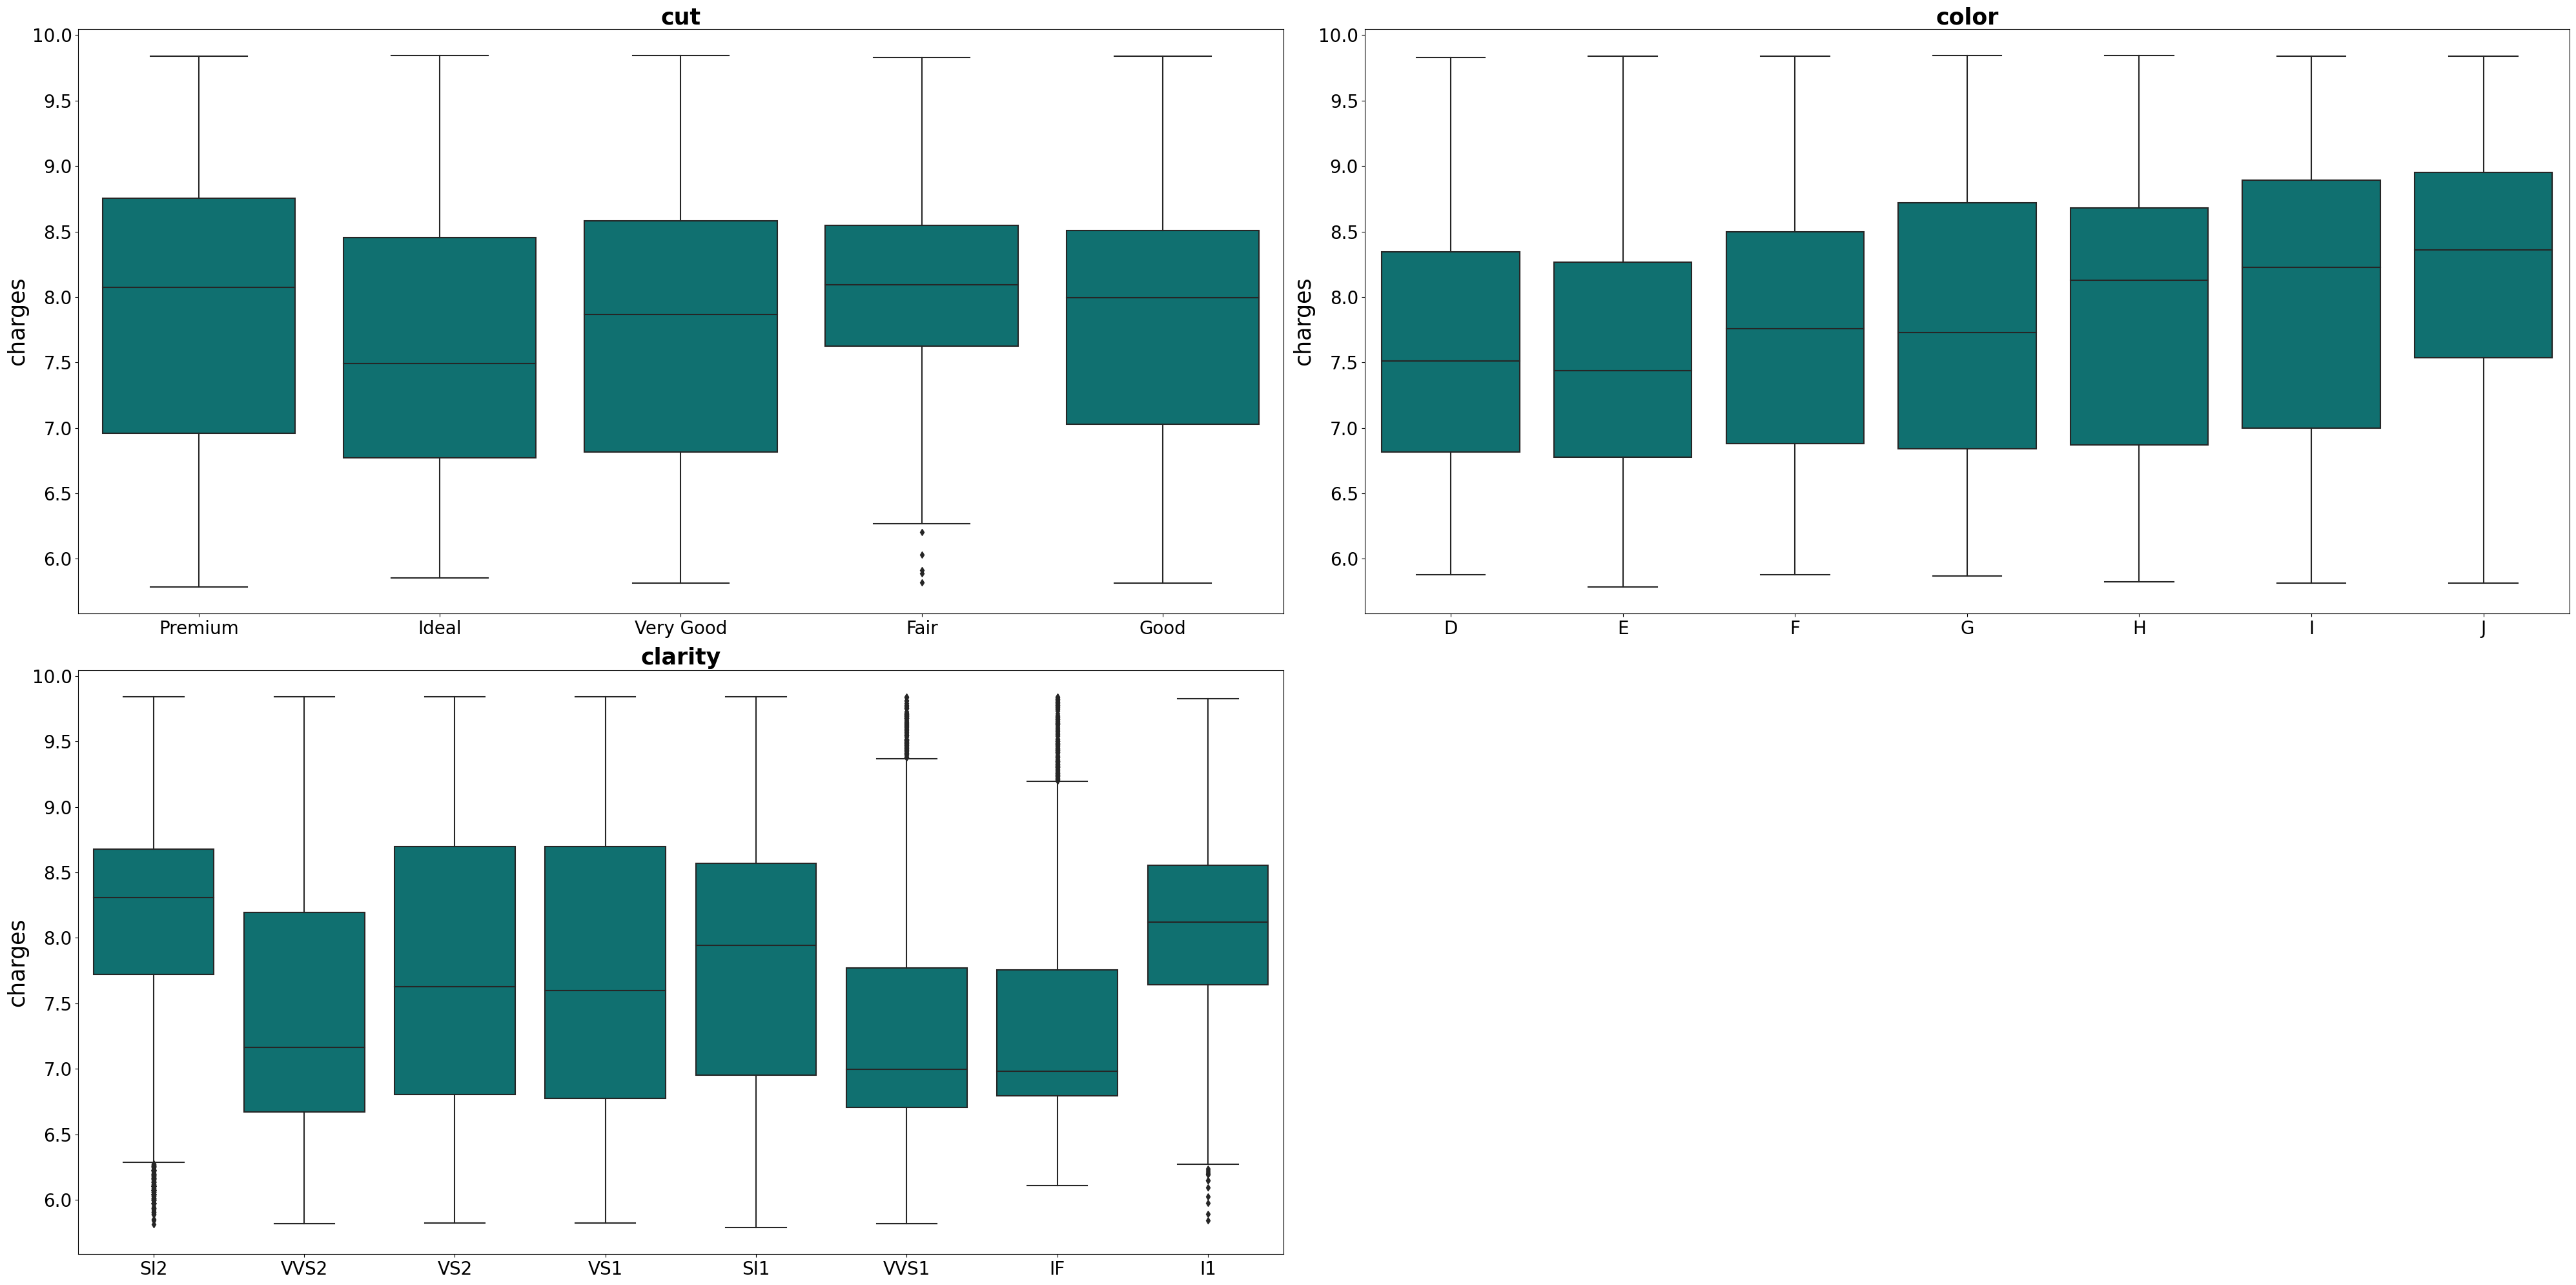

In [25]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (40, 20))


axes = axes.flat

columnas_cat = df.select_dtypes(include = ["object", "category"]).columns

for i, colum in enumerate(columnas_cat): 
    sns.boxplot(
        data = df,
        x = colum,
        y = "price",
        color = "teal", 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 25, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel( "charges", fontsize = 25)

fig.delaxes(axes[-1])

fig.tight_layout();

In [26]:
#Fair, Good, Very Good, Premium, Ideal
df.cut.unique()


array(['Premium', 'Ideal', 'Very Good', 'Fair', 'Good'], dtype=object)

In [27]:
map_ = {"Fair" : 0,
        "Good" : 1,
        "Very Good" : 2,
        "Premium" : 3,
        "Ideal" : 4}

In [28]:
df["cut_map"] = df["cut"].map(map_)
df.drop(['cut'], axis=1, inplace= True)


In [29]:
df

,id,carat,color,clarity,depth,table,x,y,z,price,cut_map
0,0,0.30,D,SI2,62.4,58.0,4.31,4.28,2.68,6.353,3
1,1,1.01,E,VVS2,62.7,56.0,6.42,6.46,4.04,9.183,4
2,2,0.72,F,VS2,61.8,59.0,5.71,5.74,3.54,7.983,4
3,3,1.08,G,SI2,63.2,57.0,6.54,6.50,4.12,8.371,2
4,4,0.36,G,VS1,62.3,59.0,4.50,4.55,2.82,6.588,3
...,...,...,...,...,...,...,...,...,...,...,...
40450,40450,0.42,D,SI2,62.1,59.0,4.78,4.82,2.98,6.551,3
40451,40451,0.53,G,VS2,62.0,58.0,5.21,5.18,3.22,7.382,3
40452,40452,0.80,G,SI2,62.8,58.0,5.86,5.90,3.69,7.768,1
40453,40453,1.01,F,VS2,61.5,57.0,6.40,6.48,3.96,8.726,2


In [30]:
# vamos a definir una función que nos aplique este método

def one_hot_encoder(dff, columnas):
    
    '''
    columnas: lista
    '''
    
    oh = OneHotEncoder()
    
    transformados = oh.fit_transform(dff[columnas])
    
    oh_df = pd.DataFrame(transformados.toarray(), columns = oh.get_feature_names_out(), dtype = int)
    
    dff[oh_df.columns] = oh_df
    
    dff.drop(columnas, axis = 1, inplace = True)
    
    return dff

In [31]:
df = one_hot_encoder(df, ["color", "clarity"])
df.head()

,id,carat,depth,table,x,y,z,price,cut_map,color_D,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,0.30,62.4,58.0,4.31,4.28,2.68,6.353,3,1,...,0,0,0,0,0,1,0,0,0,0
1,1,1.01,62.7,56.0,6.42,6.46,4.04,9.183,4,0,...,0,0,0,0,0,0,0,0,0,1
2,2,0.72,61.8,59.0,5.71,5.74,3.54,7.983,4,0,...,0,0,0,0,0,0,0,1,0,0
3,3,1.08,63.2,57.0,6.54,6.50,4.12,8.371,2,0,...,0,0,0,0,0,1,0,0,0,0
4,4,0.36,62.3,59.0,4.50,4.55,2.82,6.588,3,0,...,0,0,0,0,0,0,1,0,0,0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            40455 non-null  int64  
 1   carat         40455 non-null  float64
 2   depth         40455 non-null  float64
 3   table         40455 non-null  float64
 4   x             40455 non-null  float64
 5   y             40455 non-null  float64
 6   z             40455 non-null  float64
 7   price         40455 non-null  float64
 8   cut_map       40455 non-null  int64  
 9   color_D       40455 non-null  int32  
 10  color_E       40455 non-null  int32  
 11  color_F       40455 non-null  int32  
 12  color_G       40455 non-null  int32  
 13  color_H       40455 non-null  int32  
 14  color_I       40455 non-null  int32  
 15  color_J       40455 non-null  int32  
 16  clarity_I1    40455 non-null  int32  
 17  clarity_IF    40455 non-null  int32  
 18  clarity_SI1   40455 non-nu

In [33]:
df.isnull().sum()

id              0
carat           0
depth           0
table           0
x               0
y               0
z               0
price           0
cut_map         0
color_D         0
color_E         0
color_F         0
color_G         0
color_H         0
color_I         0
color_J         0
clarity_I1      0
clarity_IF      0
clarity_SI1     0
clarity_SI2     0
clarity_VS1     0
clarity_VS2     0
clarity_VVS1    0
clarity_VVS2    0
dtype: int64

## Standardization And Normalization


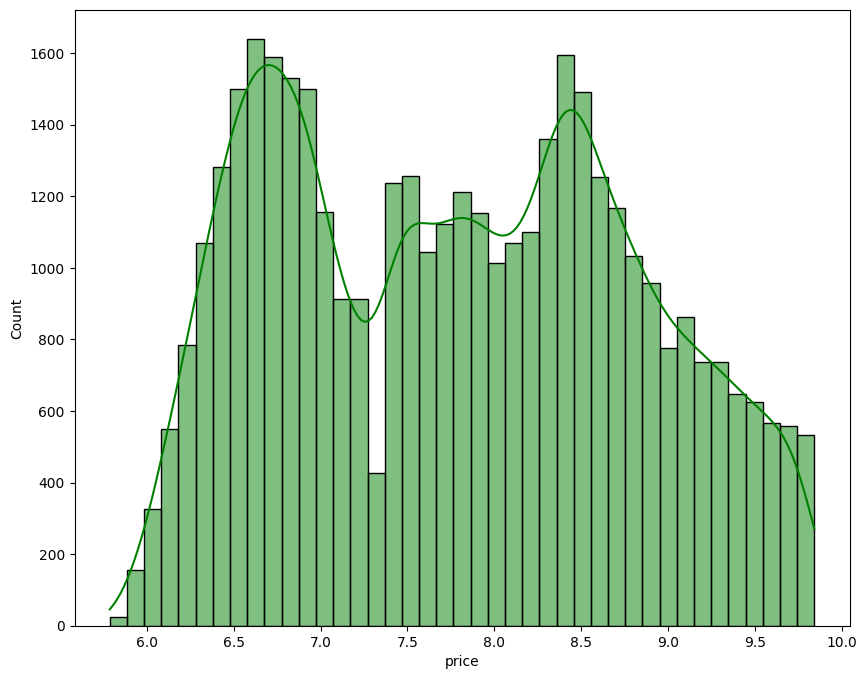

In [34]:
sns.histplot(df["price"], 
             kde = True, 
             color = "green");


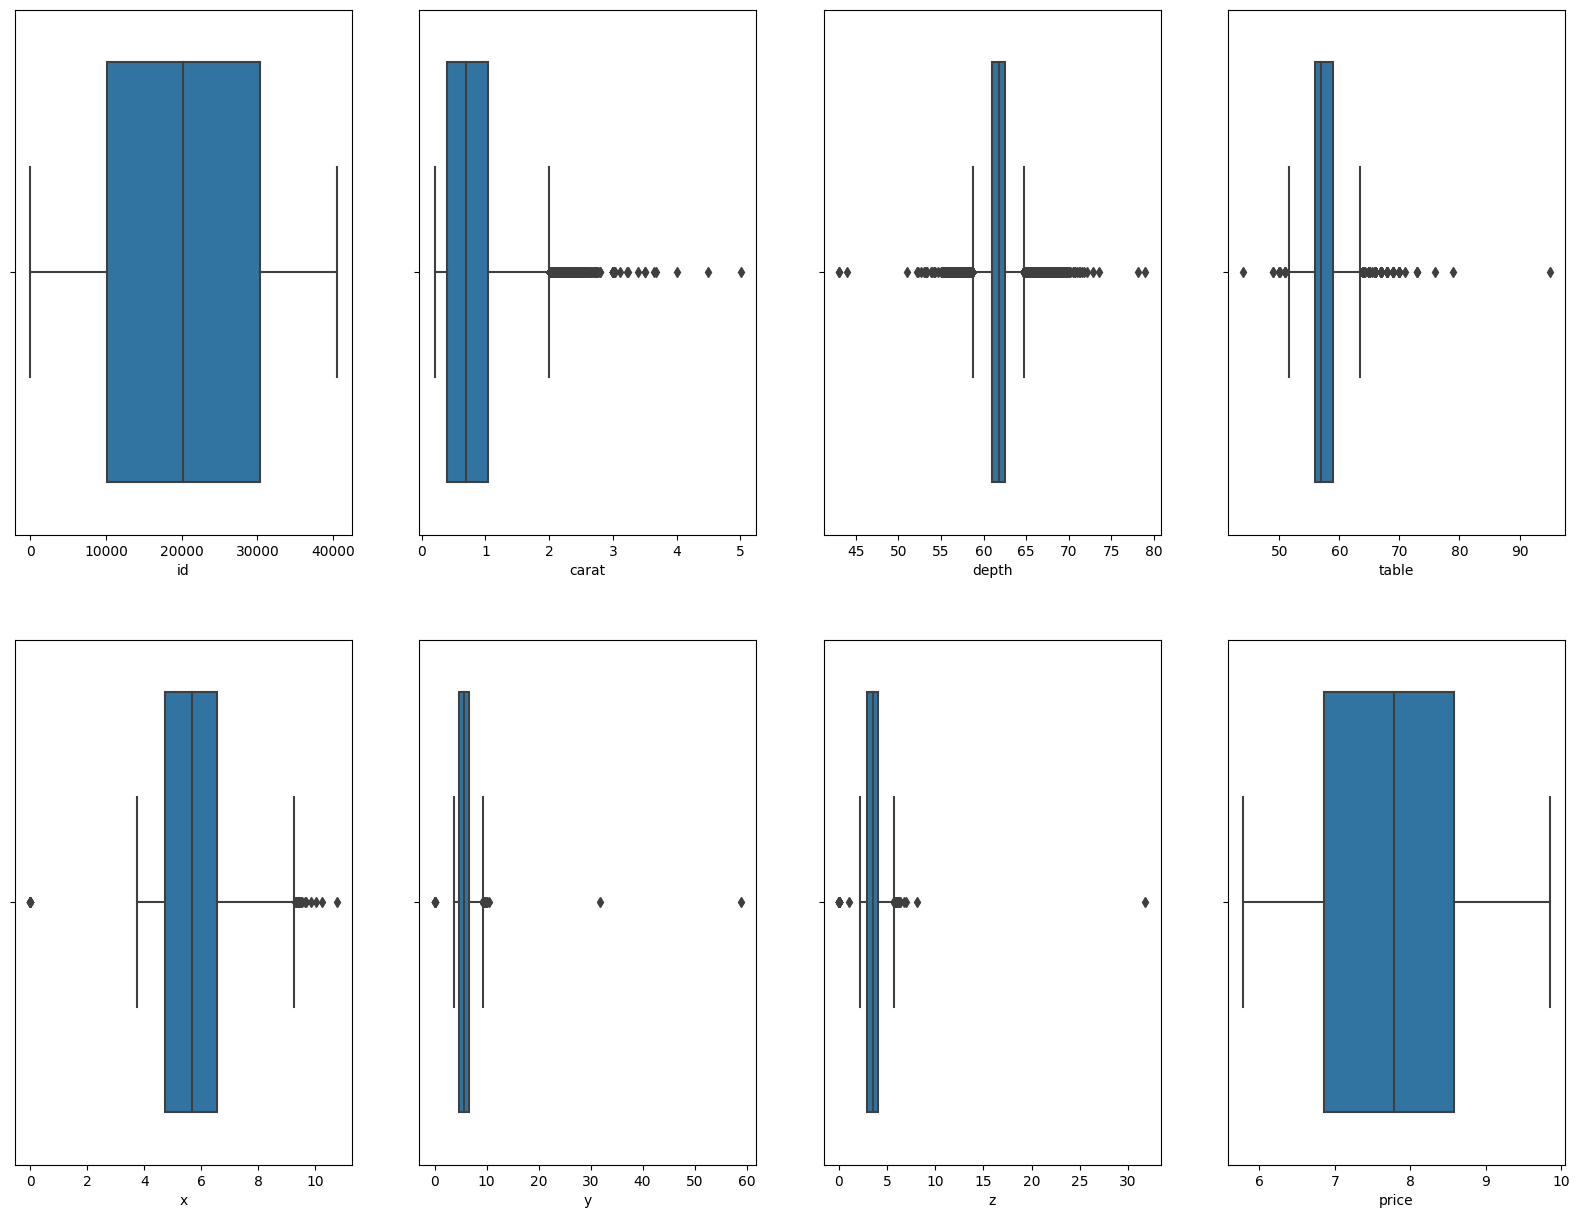

In [35]:
fig, axes = plt.subplots(2, 4, figsize=(20,15))
axes = axes.flat

for indice, columna in enumerate(df_numericas.columns):
    sns.boxplot(x=columna, data=df_numericas, ax=axes[indice])
plt.show()

In [36]:
stats.shapiro(df["price"])

ShapiroResult(statistic=0.9629329442977905, pvalue=0.0)

In [37]:
df["price_box"], lambda_ajustada = stats.boxcox(df['price'])
df['price_log'] = df['price'].apply(lambda x: np.log(x) if x != 0 else 0)
df['price_SQRT'] = df['price'].apply(lambda x: math.sqrt(x))

# construir el modelo de escalador
minmax = MinMaxScaler()
df["price_Minmax"] = minmax.fit_transform(df[["price"]])
df.head(2)

,id,carat,depth,table,x,y,z,price,cut_map,color_D,...,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price_box,price_log,price_SQRT,price_Minmax
0,0,0.30,62.4,58.0,4.31,4.28,2.68,6.353,3,1,...,0,1,0,0,0,0,2.273071,1.848927,2.520516,0.139581
1,1,1.01,62.7,56.0,6.42,6.46,4.04,9.183,4,0,...,0,0,0,0,0,1,2.845042,2.217354,3.030347,0.837485


In [38]:
for i in df.columns[-4:]:
   print(f"La transformación {i} tiene un valor de shapiro de: {stats.shapiro(df[i])[1]}")

La transformación price_box tiene un valor de shapiro de: 0.0
La transformación price_log tiene un valor de shapiro de: 0.0
La transformación price_SQRT tiene un valor de shapiro de: 0.0
La transformación price_Minmax tiene un valor de shapiro de: 0.0


In [39]:
# ninguno cumple la asunciones, por lo que nos quedamos con la variable original
df.drop(df.columns[-4:], axis = 1, inplace = True)
df.head()

,id,carat,depth,table,x,y,z,price,cut_map,color_D,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,0.30,62.4,58.0,4.31,4.28,2.68,6.353,3,1,...,0,0,0,0,0,1,0,0,0,0
1,1,1.01,62.7,56.0,6.42,6.46,4.04,9.183,4,0,...,0,0,0,0,0,0,0,0,0,1
2,2,0.72,61.8,59.0,5.71,5.74,3.54,7.983,4,0,...,0,0,0,0,0,0,0,1,0,0
3,3,1.08,63.2,57.0,6.54,6.50,4.12,8.371,2,0,...,0,0,0,0,0,1,0,0,0,0
4,4,0.36,62.3,59.0,4.50,4.55,2.82,6.588,3,0,...,0,0,0,0,0,0,1,0,0,0


In [40]:
# creamos una lista con todas las variables numericas predictoras, eliminamos la variable respuesta porque esa esta normalizada
num_col = ['carat', 'depth', 'table', 'x', 'y', 'z']

In [41]:
# iniciamos la clase para escalar
scaler_robust = RobustScaler()

# ajustamos nuestros datos
X_escaladas_robust = scaler_robust.fit_transform(df[num_col])

# hacemos una copia del dataframe para insertar las columnas estandarizadas
df_robust = df.copy()


# insertamos los valores estandarizados en el DataFrame
df_robust[num_col] = X_escaladas_robust
df_robust.head()

,id,carat,depth,table,x,y,z,price,cut_map,color_D,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,-0.625000,0.400000,0.333333,-0.754098,-0.780220,-0.750000,6.353,3,1,...,0,0,0,0,0,1,0,0,0,0
1,1,0.484375,0.600000,-0.333333,0.398907,0.417582,0.464286,9.183,4,0,...,0,0,0,0,0,0,0,0,0,1
2,2,0.031250,0.000000,0.666667,0.010929,0.021978,0.017857,7.983,4,0,...,0,0,0,0,0,0,0,1,0,0
3,3,0.593750,0.933333,0.000000,0.464481,0.439560,0.535714,8.371,2,0,...,0,0,0,0,0,1,0,0,0,0
4,4,-0.531250,0.333333,0.666667,-0.650273,-0.631868,-0.625000,6.588,3,0,...,0,0,0,0,0,0,1,0,0,0


In [43]:
# df.to_csv("../data/one.csv")